In [1]:
import os
import matplotlib as mpl
import matplotlib.pylab as plt
import itertools
import csv , codecs
import glob
from PIL import Image
import numpy as np
import pandas as pd
import openpyxl
from openpyxl import Workbook
from openpyxl import load_workbook
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedKFold
def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA



## CSV 파일 생성 함수


### task 0 1 2 : 1-back,  2-back,  rest

### eye 0  1    : close eye,     open eye

### respiratory 0 1 2 : mouse, nose, O2 



In [2]:


eeg_data_3 = pd.read_csv('./dataset_eeg_4.csv',index_col=0)

In [3]:
state={}

state["1back_mouse"]=eeg_data_3.iloc[0:20]
state["1back_nose"]=eeg_data_3.iloc[20:40]
state["1back_O2"]=eeg_data_3.iloc[40:60]

state["2back_mouse"]=eeg_data_3.iloc[60:80]
state["2back_nose"]=eeg_data_3.iloc[80:100]
state["2back_O2"]=eeg_data_3.iloc[100:120]

state["close_rest_mouse"]=eeg_data_3.iloc[120:140]
state["close_rest_nose"]=eeg_data_3.iloc[140:160]
state["close_rest_O2"]=eeg_data_3.iloc[160:180]

state["open_rest_mouse"]=eeg_data_3.iloc[180:200]
state["open_rest_nose"]=eeg_data_3.iloc[200:220]
state["open_rest_O2"]=eeg_data_3.iloc[220:240]

In [4]:
ds_train = {}
ds_test = {}


ds_train={"1back_mouse":state["1back_mouse"], 
       "1back_nose":state["1back_nose"],
       "1back_O2":state["1back_O2"],
       "1back_m_n":state["1back_mouse"].append(state["1back_nose"]),
       "1back":state["1back_mouse"].append(state["1back_nose"]).append(state["1back_O2"]),
       
                                               
       "2back_mouse":state["2back_mouse"],
       "2back_nose":state["2back_nose"],
       "2back_O2":state["2back_O2"],
       "2back_m_n":state["2back_mouse"].append(state["2back_nose"]),
       "2back":state["2back_mouse"].append(state["2back_nose"]).append(state["2back_O2"]),
       
       "close_rest_mouse":state["close_rest_mouse"], 
       "close_rest_nose":state["close_rest_nose"],
       "close_rest_O2":state["close_rest_O2"],
       "close_rest_m_n":state["close_rest_mouse"].append(state["close_rest_nose"]),
       "close_rest":state["close_rest_mouse"].append(state["close_rest_nose"]).append(state["close_rest_O2"]),
       
       "open_rest_mouse":state["open_rest_mouse"],
       "open_rest_nose":state["open_rest_nose"],
       "open_rest_O2":state["open_rest_O2"],
       "open_rest_m_n":state["open_rest_mouse"].append(state["open_rest_nose"]),
       "open_rest":state["open_rest_mouse"].append(state["open_rest_nose"]).append(state["open_rest_O2"]),
       
       
       "total_mouse" : state["1back_mouse"].append(state["2back_mouse"]).append(state["close_rest_mouse"]).append(state["open_rest_mouse"]),
       "total_nose" : state["1back_nose"].append(state["2back_nose"]).append(state["close_rest_nose"]).append(state["open_rest_nose"]),
       "total_O2" : state["1back_O2"].append(state["2back_O2"]).append(state["close_rest_O2"]).append(state["open_rest_O2"]),
       "total_m_n": state["1back_mouse"].append(state["1back_nose"]).append(state["2back_mouse"]).append(state["2back_nose"]).append(state["close_rest_mouse"]).append(state["close_rest_nose"]).append(state["open_rest_mouse"]).append(state["open_rest_nose"]),
       "total": state["1back_mouse"].append(state["1back_nose"]).append(state["1back_O2"]).append(state["2back_mouse"]).append(state["2back_nose"]).append(state["2back_O2"]).append(state["close_rest_mouse"]).append(state["close_rest_nose"]).append(state["close_rest_O2"]).append(state["open_rest_mouse"]).append(state["open_rest_nose"]).append(state["open_rest_O2"])
       
       
      }

ds_test = {"1back_mouse":state["1back_mouse"], 
       "1back_nose":state["1back_nose"],
       "1back_O2":state["1back_O2"],
       "1back_m_n":state["1back_mouse"].append(state["1back_nose"]),
       "1back":state["1back_mouse"].append(state["1back_nose"]).append(state["1back_O2"]),
       
                                               
       "2back_mouse":state["2back_mouse"],
       "2back_nose":state["2back_nose"],
       "2back_O2":state["2back_O2"],
       "2back_m_n":state["2back_mouse"].append(state["2back_nose"]),
       "2back":state["2back_mouse"].append(state["2back_nose"]).append(state["2back_O2"]),
       
       "close_rest_mouse":state["close_rest_mouse"], 
       "close_rest_nose":state["close_rest_nose"],
       "close_rest_O2":state["close_rest_O2"],
       "close_rest_m_n":state["close_rest_mouse"].append(state["close_rest_nose"]),
       "close_rest":state["close_rest_mouse"].append(state["close_rest_nose"]).append(state["close_rest_O2"]),
       
       "open_rest_mouse":state["open_rest_mouse"],
       "open_rest_nose":state["open_rest_nose"],
       "open_rest_O2":state["open_rest_O2"],
       "open_rest_m_n":state["open_rest_mouse"].append(state["open_rest_nose"]),
       "open_rest":state["open_rest_mouse"].append(state["open_rest_nose"]).append(state["open_rest_O2"]),
        
        
               
       "total_mouse" : state["1back_mouse"].append(state["2back_mouse"]).append(state["close_rest_mouse"]).append(state["open_rest_mouse"]),
        "total_nose" : state["1back_nose"].append(state["2back_nose"]).append(state["close_rest_nose"]).append(state["open_rest_nose"]),
       "total_O2" : state["1back_O2"].append(state["2back_O2"]).append(state["close_rest_O2"]).append(state["open_rest_O2"]),
       "total_m_n": state["1back_mouse"].append(state["1back_nose"]).append(state["2back_mouse"]).append(state["2back_nose"]).append(state["close_rest_mouse"]).append(state["close_rest_nose"]).append(state["open_rest_mouse"]).append(state["open_rest_nose"]),
        "total": state["1back_mouse"].append(state["1back_nose"]).append(state["1back_O2"]).append(state["2back_mouse"]).append(state["2back_nose"]).append(state["2back_O2"]).append(state["close_rest_mouse"]).append(state["close_rest_nose"]).append(state["close_rest_O2"]).append(state["open_rest_mouse"]).append(state["open_rest_nose"]).append(state["open_rest_O2"])

       }




In [5]:
def LDA_RF_M_N_O2 (tasks, k_parameter, num_iter):

#     for mode in ['no_lda','lda']:
    for mode in ['lda']:
        for task_train,task_test in tasks:

            print('-------------------')
            print('training:{}/test:{}/mode:{}'.format(task_train,task_test,mode))
            train_3 = ds_train[task_train]
            test_3  = ds_test[task_test]

            X = np.array(train_3.iloc[:,0:-2])
            Y = np.array(train_3['target'])

            rnd_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)

            all_scores = []
            Mouse = 0
            Nose = 0
            for idx in range(num_iter):
                skf = StratifiedKFold(n_splits=k_parameter, shuffle=True)
                skf.get_n_splits(X,Y)

                for train_index, test_index in skf.split(X,Y):

                    X_final = X
                    lda = LinearDiscriminantAnalysis(n_components=1)
                    if(mode == 'lda') : 
                        lda.fit(X,Y)
#                         X_final = X
                        X_final = lda.transform(X)
                    

                    rnd_clf.fit(X_final[train_index], Y[train_index])
                    val_mae = rnd_clf.score(X_final[test_index],Y[test_index])
                    all_scores.append(val_mae)

                    test = np.array(test_3.iloc[:,0:-2])
                    if mode == 'lda':
#                         pass
                        test = lda.transform(test)

                    aaa = rnd_clf.predict(test)

                    Mouse = Mouse+np.count_nonzero(aaa==0)
                    Nose = Nose+ np.count_nonzero(aaa==1)

            print('model_score:{}'.format(np.mean(all_scores)))
            print('mouse:{}({:.2}), nose:{}({:.2}) / total:{}'.format(Mouse,Mouse/(Mouse+Nose),Nose,Nose/(Mouse+Nose),(Mouse+Nose)))

# Task list

        * 1back_mouse, 1back_nose, 1back_O2, 1back_m_n, 1back
        
        
        * 2back_mouse, 2back_nose, 2back_O2, 2back_m_n, 2back
        
        
        * close_rest_mouse, close_rest_nose, close_rest_O2, close_rest_m_n, close_rest
        
        
        * open_rest_mouse, open_rest_nose, open_rest_O2, open_rest_m_n, open_rest
        
        * total_mouse, total_nose, total_O2, total_m_n
 


### Poster Result data

* train : close_rest_mouse_nose

* test
    1. open_rest_O2
    2. 1back_O2
    3. 2back_O2
    
task difficult level이 올라갈 수록 Mouse O2를 Nose로 판단하는 경향이 나타났다.

In [6]:
print("Poster Result data")
tasks1 = [
    ('close_rest_m_n','close_rest_O2'),
    ('close_rest_m_n','open_rest_O2'),
     ('close_rest_m_n','1back_O2'),
     ('close_rest_m_n','2back_O2'),
    ('close_rest_m_n','open_rest_mouse'),
    ('close_rest_m_n','open_rest_nose'),
     ('close_rest_m_n','1back_mouse'),
     ('close_rest_m_n','1back_nose'),
     ('close_rest_m_n','2back_mouse'),
     ('close_rest_m_n','2back_nose'),
 ]
print("LDA-RF")
LDA_RF_M_N_O2(tasks1,k_parameter = 10,num_iter = 1)


Poster Result data
LDA-RF
-------------------
training:close_rest_m_n/test:close_rest_O2/mode:lda
model_score:0.95
mouse:101(0.51), nose:99(0.49) / total:200
-------------------
training:close_rest_m_n/test:open_rest_O2/mode:lda
model_score:0.95
mouse:100(0.5), nose:100(0.5) / total:200
-------------------
training:close_rest_m_n/test:1back_O2/mode:lda
model_score:0.95
mouse:71(0.35), nose:129(0.65) / total:200
-------------------
training:close_rest_m_n/test:2back_O2/mode:lda
model_score:0.95
mouse:50(0.25), nose:150(0.75) / total:200
-------------------
training:close_rest_m_n/test:open_rest_mouse/mode:lda
model_score:0.95
mouse:70(0.35), nose:130(0.65) / total:200
-------------------
training:close_rest_m_n/test:open_rest_nose/mode:lda
model_score:0.975
mouse:40(0.2), nose:160(0.8) / total:200
-------------------
training:close_rest_m_n/test:1back_mouse/mode:lda
model_score:0.975
mouse:61(0.3), nose:139(0.69) / total:200
-------------------
training:close_rest_m_n/test:1back_nose/mo

---
---
---
---
---


## LDA train
### close rest mouse and nose, 
### open rest mouse and nose
### 1back mouse and nose
### 2back mouse and nose



In [7]:
def test(tasks, k_parameter, num_iter):
    for task_train,task_test in tasks:
        print('-------------------')
        print('training:{}/test:{}'.format(task_train,task_test))
        train_3 = ds_train[task_train]
        test_3  = ds_test[task_test]
        m_n = ds_train['total_m_n']
        m_n_X = np.array(m_n.iloc[:,0:-2])
        m_n_Y = np.array(m_n['target'])
        lda = LinearDiscriminantAnalysis(n_components=1)
        lda.fit(m_n_X,m_n_Y)

        X = np.array(train_3.iloc[:,0:-2])
        Y = np.array(train_3['target'])

        rnd_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)

        all_scores = []
        Mouse = 0
        Nose = 0
        for idx in range(num_iter):
            skf = StratifiedKFold(n_splits=k_parameter, shuffle=True)
            skf.get_n_splits(X,Y)

            for train_index, test_index in skf.split(X,Y):
                X_final = lda.transform(X)
                rnd_clf.fit(X_final[train_index], Y[train_index])
                val_mae = rnd_clf.score(X_final[test_index],Y[test_index])
                all_scores.append(val_mae)

                test = np.array(test_3.iloc[:,0:-2])
                test = lda.transform(test)

                aaa = rnd_clf.predict(test)

                Mouse = Mouse+np.count_nonzero(aaa==0)
                Nose = Nose+ np.count_nonzero(aaa==1)

        print('model_score:{}'.format(np.mean(all_scores)))
        print('mouse:{}({:.2}), nose:{}({:.2}) / total:{}'.format(Mouse,Mouse/(Mouse+Nose),Nose,Nose/(Mouse+Nose),(Mouse+Nose)))

In [8]:
tasks1 = [
    ('close_rest_m_n','close_rest_O2'),
    ('close_rest_m_n','open_rest_O2'),
     ('close_rest_m_n','1back_O2'),
     ('close_rest_m_n','2back_O2'),

 ]
print("test")
test(tasks1,k_parameter = 10,num_iter = 50)


test
-------------------
training:close_rest_m_n/test:close_rest_O2
model_score:0.902
mouse:2500(0.25), nose:7500(0.75) / total:10000
-------------------
training:close_rest_m_n/test:open_rest_O2
model_score:0.901
mouse:4503(0.45), nose:5497(0.55) / total:10000
-------------------
training:close_rest_m_n/test:1back_O2
model_score:0.9075
mouse:5580(0.56), nose:4420(0.44) / total:10000
-------------------
training:close_rest_m_n/test:2back_O2
model_score:0.9025
mouse:5092(0.51), nose:4908(0.49) / total:10000


---
# 논문의 실험 과정


논문의 내용은 Rest closed eye mouth and nose breathing 으로 학습을 하여 task의 difficulty level이 높아질수록 산소 필요량이 늘어나 nose로 잘못 판단할 것이다.

* LDARF Classifier
* Train 
    * Rest closed eye mouth and nose breathing

* Test 
    * Rest closed eye mouth O2 breathing
    * Rest opened eye mouth O2 breathing
    * 1-back mouth O2 breathing
    * 2-back mouth O2 breathing
    
## Result Accuracy

* Rest closed eye mouth O2 breathing : 51%
* Rest opened eye mouth O2 breathing : 50%
* 1-back mouth O2 breathing : 35%
* 2-back mouth O2 breathing : 25%


## 위의 실험 과정

LDA에 Rest closed eye mouth and nose breathing, Rest opened eye mouth and nose breathing, 1-back mouth and nose breathing, 2-back mouth and nose breathing을 학습시키고 Random Forest에는 Rest closed eye mouth and nose breathing을 학습 시킴

* LDA Train
    * Total mouth and nose breathing(Rest closed eye mouth and nose breathing, Rest opened eye mouth and nose breathing, 1-back mouth and nose breathing, 2-back mouth and nose breathing)
* Random Forest Train
    * Rest closed eye mouth and nose breathing

* Test 
    * Rest closed eye mouth O2 breathing
    * Rest opened eye mouth O2 breathing
    * 1-back mouth O2 breathing
    * 2-back mouth O2 breathing
    
### Result Accuracy

total mouth and nose breathing으로 학습을 시킨 경우 task의 difficulty level이 높아질수록 정확히 mouth로 판단하는 경향을 보이고 있다.


* Rest closed eye mouth O2 breathing : 25%
* Rest opened eye mouth O2 breathing : 45%
* 1-back mouth O2 breathing : 56%
* 2-back mouth O2 breathing : 51%

---

* 논문의 결과 

### Accuracy

* Rest closed eye mouth O2 breathing : 51%
* Rest opened eye mouth O2 breathing : 50%
* 1-back mouth O2 breathing : 35%
* 2-back mouth O2 breathing : 25%
---


In [9]:
tasks2 = [
    ('close_rest_m_n','close_rest_O2'),
    ('close_rest_m_n','open_rest_O2'),
     ('close_rest_m_n','1back_O2'),
     ('close_rest_m_n','2back_O2'),
    
    
    ('close_rest_m_n','open_rest_mouse'),
    ('close_rest_m_n','open_rest_nose'),
     ('close_rest_m_n','1back_mouse'),
     ('close_rest_m_n','1back_nose'),
     ('close_rest_m_n','2back_mouse'),
     ('close_rest_m_n','2back_nose'),
 ]
print("test")
test(tasks2,k_parameter = 10,num_iter = 50)


test
-------------------
training:close_rest_m_n/test:close_rest_O2
model_score:0.9025
mouse:2500(0.25), nose:7500(0.75) / total:10000
-------------------
training:close_rest_m_n/test:open_rest_O2
model_score:0.9025
mouse:4503(0.45), nose:5497(0.55) / total:10000
-------------------
training:close_rest_m_n/test:1back_O2
model_score:0.898
mouse:5599(0.56), nose:4401(0.44) / total:10000
-------------------
training:close_rest_m_n/test:2back_O2
model_score:0.9015
mouse:5094(0.51), nose:4906(0.49) / total:10000
-------------------
training:close_rest_m_n/test:open_rest_mouse
model_score:0.903
mouse:9000(0.9), nose:1000(0.1) / total:10000
-------------------
training:close_rest_m_n/test:open_rest_nose
model_score:0.9055
mouse:541(0.054), nose:9459(0.95) / total:10000
-------------------
training:close_rest_m_n/test:1back_mouse
model_score:0.9065
mouse:9003(0.9), nose:997(0.1) / total:10000
-------------------
training:close_rest_m_n/test:1back_nose
model_score:0.903
mouse:0(0.0), nose:10000

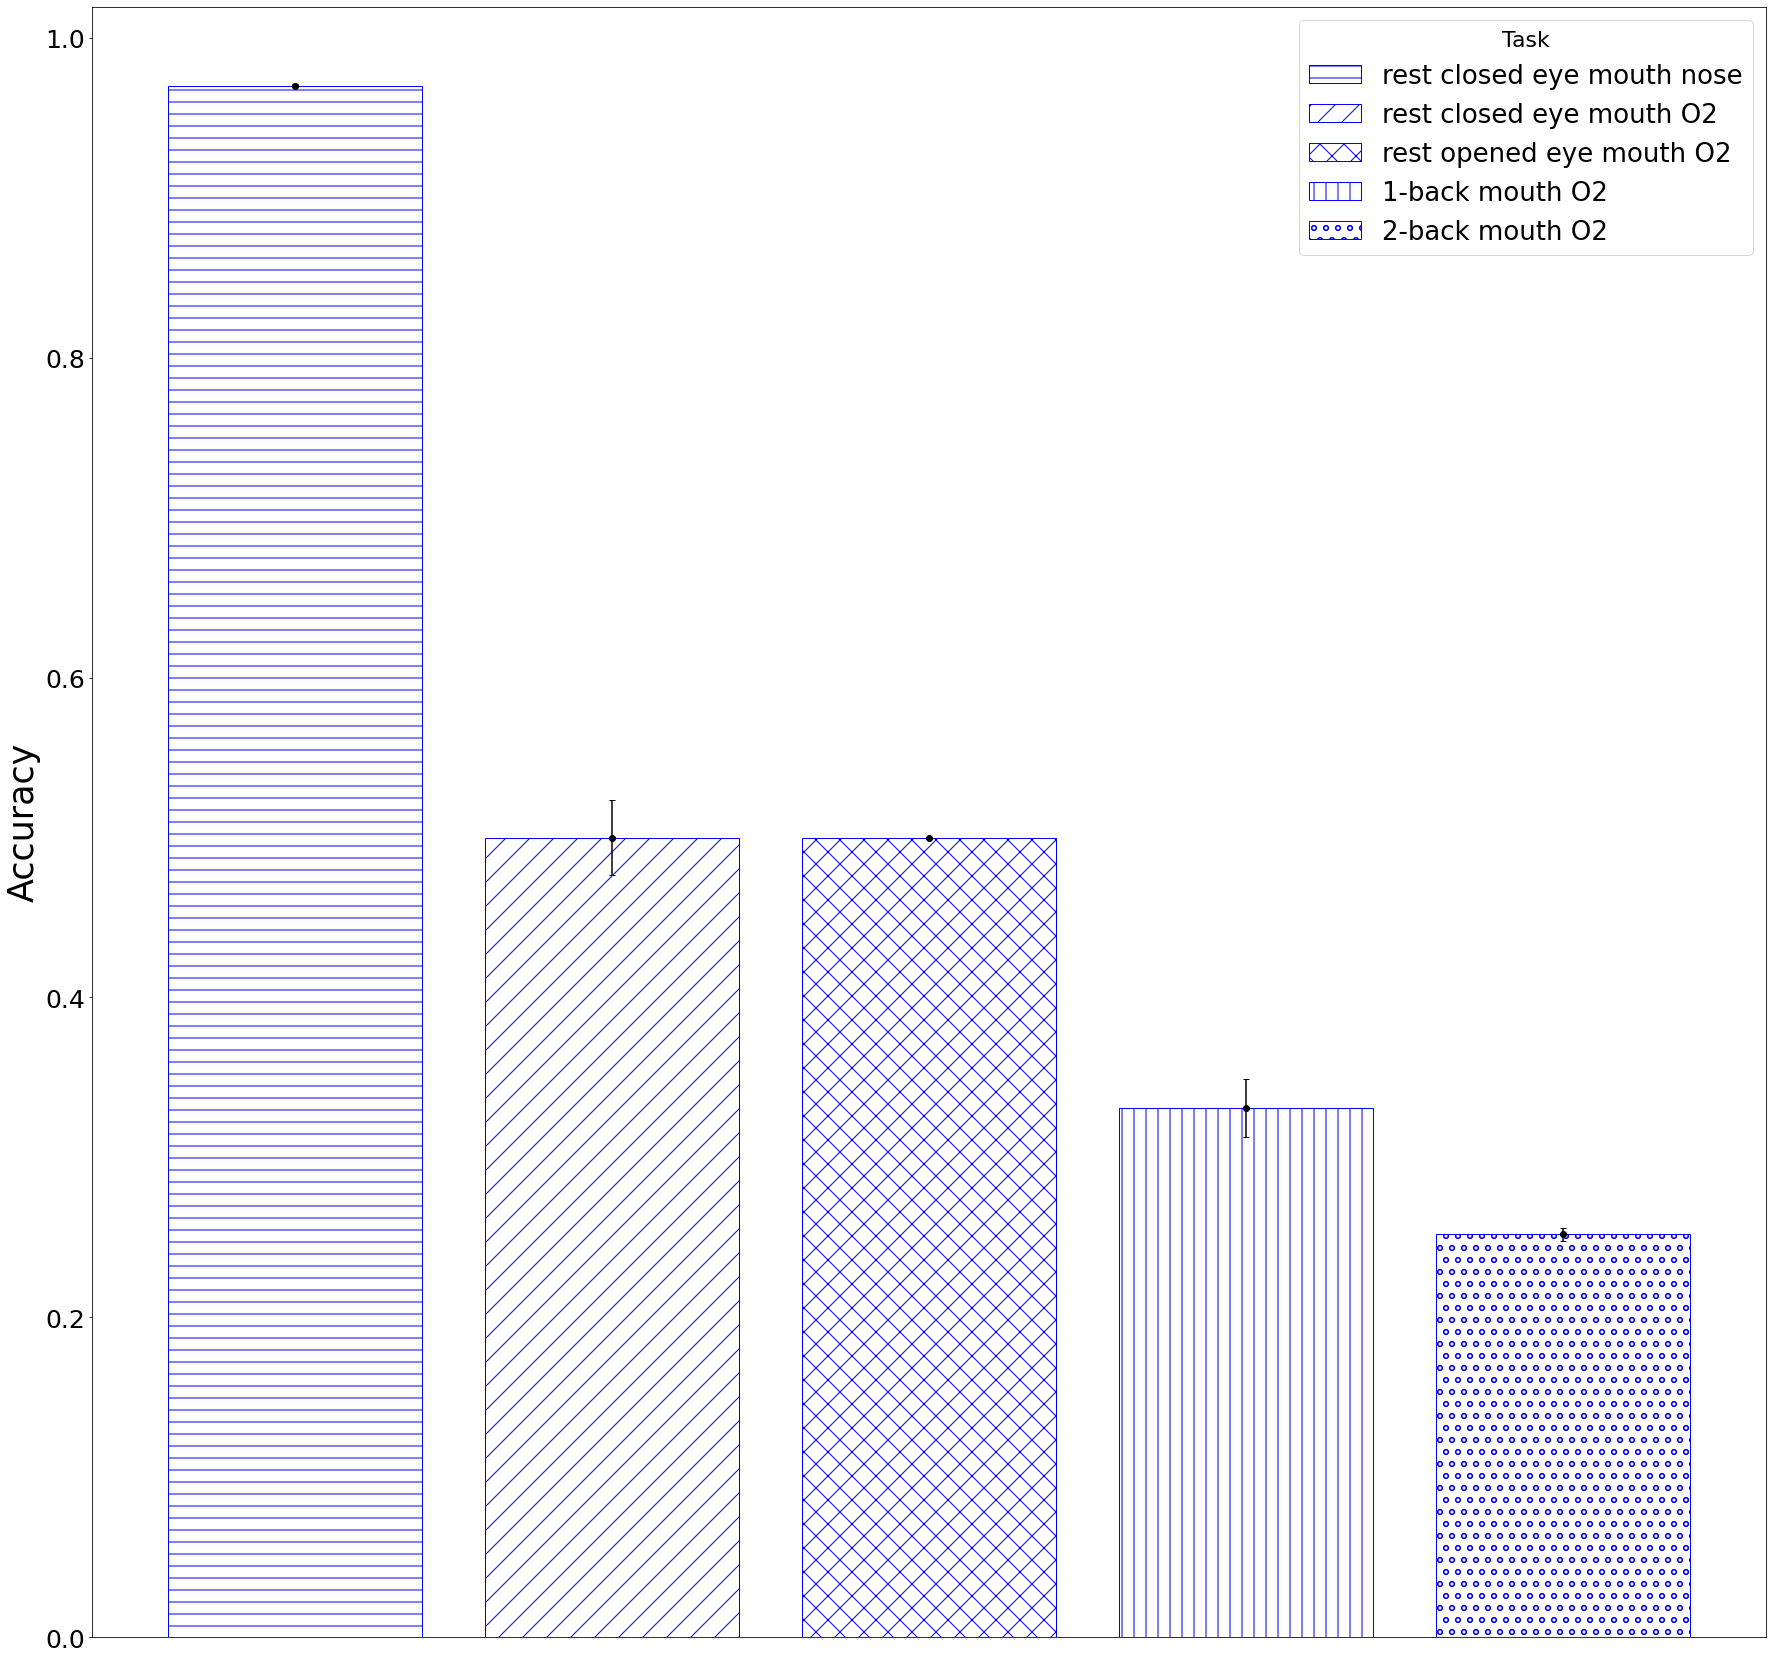

In [48]:
fig = plt.figure(figsize=(30,30))
bar1, = plt.bar(['rest closed eye mouth nose'],0.97,color = 'w',edgecolor = 'b')
bar2,= plt.bar(['rest closed eye mouth O2'],0.5,color = 'w',edgecolor = 'b')
bar3, = plt.bar(['rest opened eye mouth O2'],0.5,color = 'w',edgecolor = 'b')
bar4,= plt.bar(['1-back mouth O2'],0.331,color = 'w',edgecolor = 'b')
bar5,= plt.bar(['2-back mouth O2'],0.252,color = 'w',edgecolor = 'b')
plt.xticks([])
plt.yticks(fontsize = 25)
plt.ylabel("Accuracy",fontsize = 35)

a = ['rest closed eye mouth nose', 'rest closed eye mouth O2','rest opened eye mouth O2','1-back mouth O2','2-back mouth O2']
b = [0.97,0.5,0.5,0.331,0.252]
std = [0.001,0.0237,0.0,0.018,0.004]
plt.errorbar(a,b,std,fmt="ko",capsize =3)
bars = [bar1,bar2, bar3,bar4, bar5]
patterns = ('-', '/', 'x', '|',  'o', 'O', '.')
for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)
plt.legend(['rest closed eye mouth nose', 'rest closed eye mouth O2','rest opened eye mouth O2','1-back mouth O2','2-back mouth O2'],fontsize =26,title = "Task").get_title().set_fontsize('22')

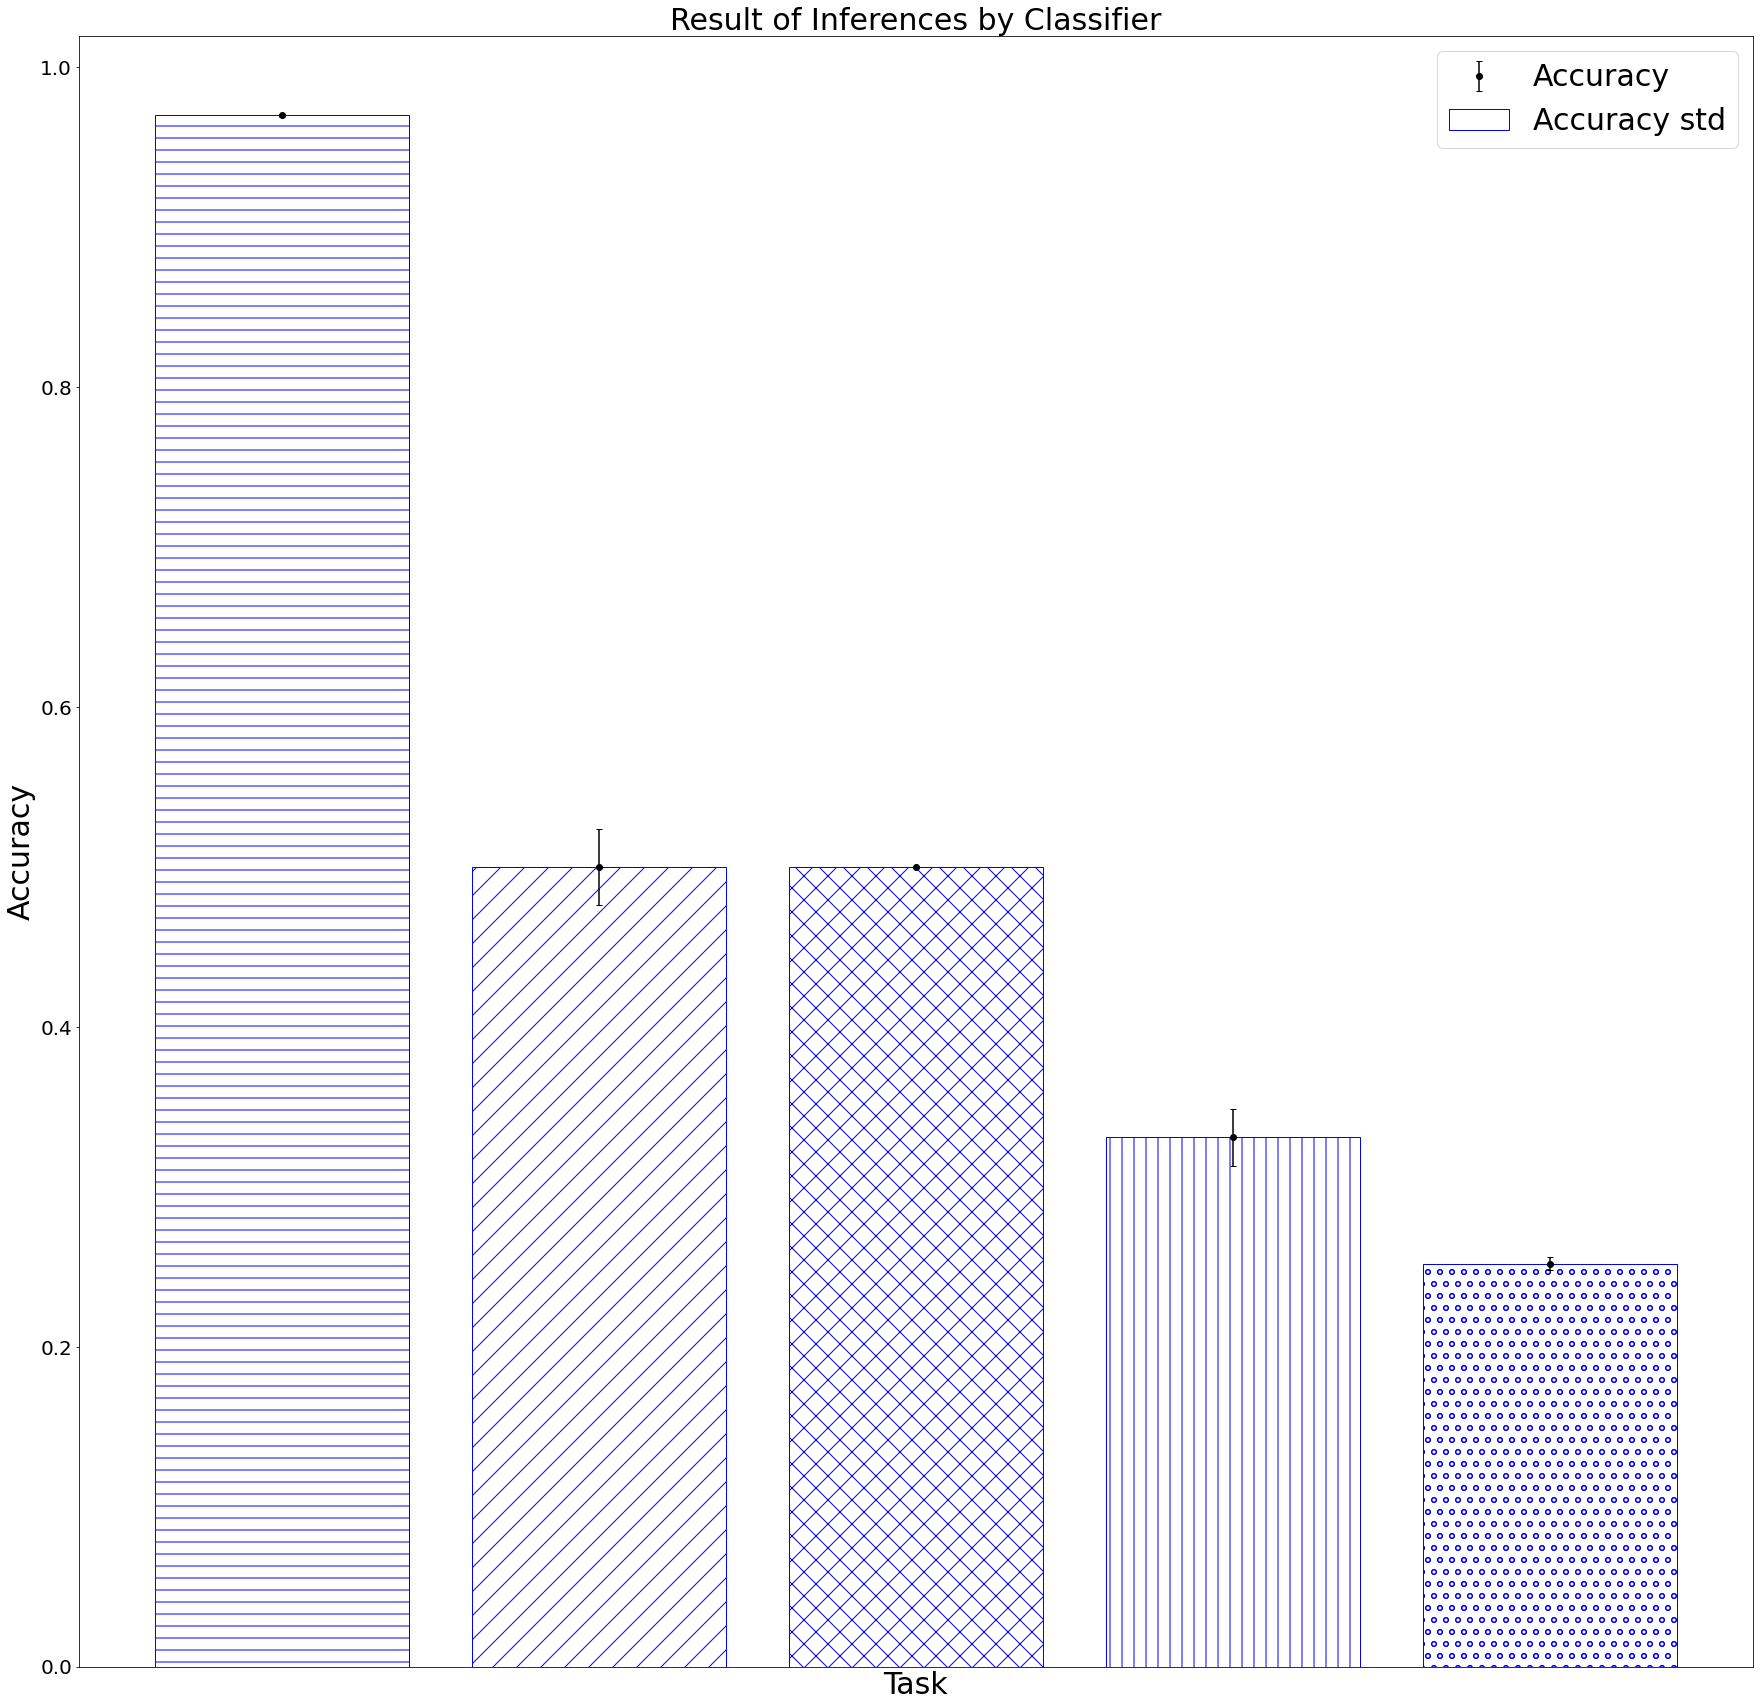

In [24]:
a = ['rest closed eye mouth nose', 'rest closed eye mouth O2','rest opened eye mouth O2','1-back mouth O2','2-back mouth O2']
b = [0.97,0.5,0.5,0.331,0.252]
std = [0.001,0.0237,0.0,0.018,0.004]
plt.figure(figsize=(30,30))
plt.xlabel("Task",fontsize = 30)
plt.xticks([])
plt.yticks(fontsize = 20)
plt.ylabel("Accuracy",fontsize = 30)
plt.title("Result of Inferences by Classifier",fontsize = 30)
plt.errorbar(a,b,std,fmt="ko",capsize =3)
bars = plt.bar(a,b,color = 'w',edgecolor = 'b') 
plt.legend(['Accuracy','Accuracy std'],fontsize = 30)

patterns = ('-', '/', 'x', '|',  'o', 'O', '.')
for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)



In [104]:
alpha = pd.read_csv('alpha.csv').sort_values("channel")
alpha

,channel,LDARF_Coefficient
5,ACh1,1.772427e-01
12,ACh10,3.723238e-02
0,ACh11,3.274692e-01
30,ACh12,-4.594577e-01
13,ACh13,2.372206e-02
27,ACh14,-2.224327e-01
11,ACh15,4.108086e-02
26,ACh16,-1.785314e-01
21,ACh17,-7.174477e-02
17,ACh18,4.840000e-15


In [123]:
alpha = pd.read_csv('alpha.csv').sort_values("channel")
for i in range(1,33,1):
    alpha["channel"][alpha["channel"]=="ACh{}".format(i)]=i
alpha_result = alpha.sort_values("channel")
alpha_channel = np.array(alpha_result["channel"])
alpha_LDARF_Coefficient = np.array(alpha_result["LDARF_Coefficient"])
alpha_result

,channel,LDARF_Coefficient
5,1,1.772427e-01
6,2,1.749345e-01
7,3,8.979298e-02
28,4,-2.319166e-01
2,5,3.019293e-01
24,6,-9.012473e-02
18,7,-2.979311e-02
8,8,6.149491e-02
19,9,-3.254560e-02
12,10,3.723238e-02


In [124]:
beta = pd.read_csv('beta.csv').sort_values("channel")
for i in range(1,33,1):
    beta["channel"][beta["channel"]=="BCh{}".format(i)]=i
beta_result = beta.sort_values("channel")
beta_channel = np.array(beta_result["channel"])
beta_LDARF_Coefficient = np.array(beta_result["LDARF_Coefficient"])
beta_result

,channel,LDARF_Coefficient
21,1,-0.187335
26,2,-0.327537
27,3,-0.480235
30,4,-0.541435
4,5,0.325155
28,6,-0.514077
5,7,0.318851
15,8,-0.015914
10,9,0.115209
23,10,-0.231825


In [125]:
delta = pd.read_csv('delta.csv').sort_values("channel")
for i in range(1,33,1):
    delta["channel"][delta["channel"]=="DCh{}".format(i)]=i
delta_result = delta.sort_values("channel")
delta_channel = np.array(delta_result["channel"])
delta_LDARF_Coefficient = np.array(delta_result["LDARF_Coefficient"])
delta_result

,channel,LDARF_Coefficient
12,1,0.032669
26,2,-0.109963
14,3,0.005582
9,4,0.050824
31,5,-0.196404
4,6,0.150288
13,7,0.031933
22,8,-0.077937
11,9,0.032729
18,10,-0.053004


In [144]:
gamma = pd.read_csv('gamma.csv').sort_values("channel")
for i in range(1,33,1):
    gamma["channel"][gamma["channel"]=="GCh{}".format(i)]=i
gamma_result = gamma.sort_values("channel")
gamma_channel = np.array(gamma_result["channel"])
gamma_LDARF_Coefficient = np.array(gamma_result["LDARF_Coefficient"])
gamma_result

,channel,LDARF_Coefficient
2,1,1.835263
6,2,1.363604
30,3,-2.478812
5,4,1.453846
24,5,-0.567581
28,6,-1.454481
31,7,-2.586092
0,8,2.755289
16,9,-0.096277
23,10,-0.514601


In [145]:
theta = pd.read_csv('theta.csv').sort_values("channel")
for i in range(1,33,1):
    theta["channel"][theta["channel"]=="TCh{}".format(i)]=i
theta_result = theta.sort_values("channel")
theta_channel = np.array(theta_result["channel"])
theta_LDARF_Coefficient = np.array(theta_result["LDARF_Coefficient"])
theta_result

,channel,LDARF_Coefficient
10,1,0.089894
2,2,0.270001
17,3,0.021161
13,4,0.057244
6,5,0.182888
20,6,-0.080315
21,7,-0.089401
8,8,0.122466
18,9,0.015739
5,10,0.199086


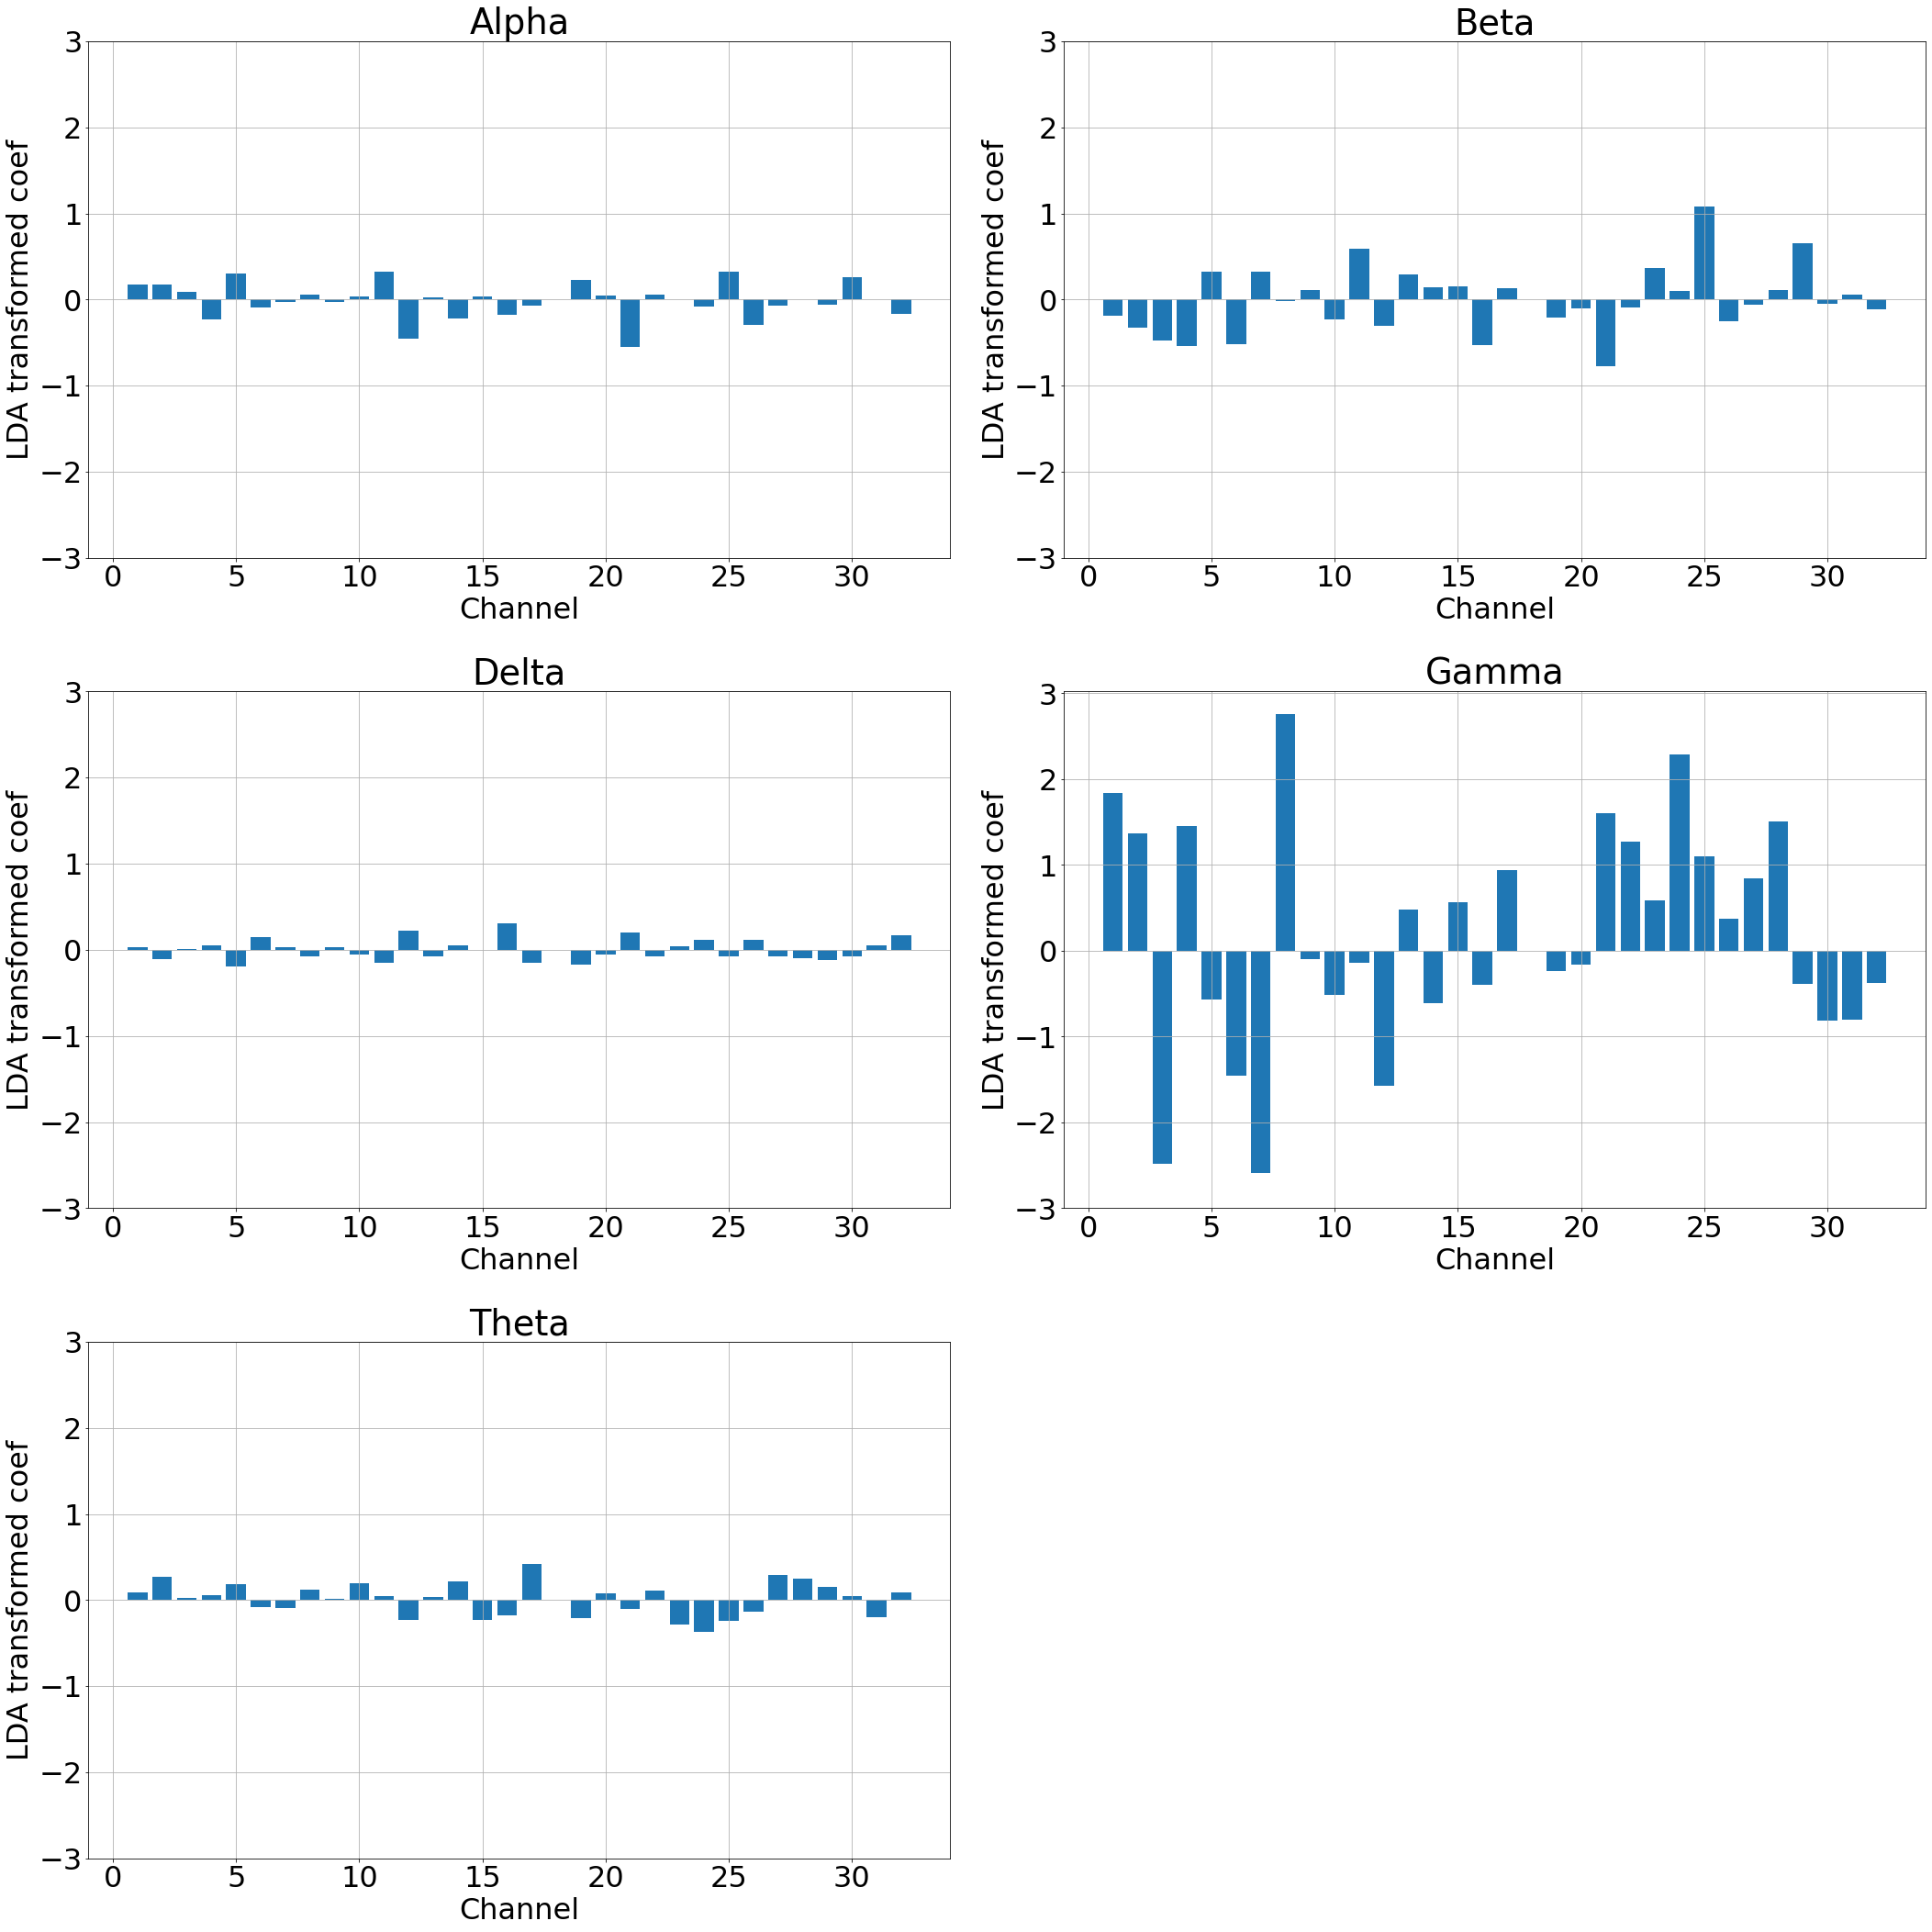

In [156]:
fig = plt.figure(figsize=(30,30))

ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3= fig.add_subplot(3,2,3)
ax4= fig.add_subplot(3,2,4)
ax5=fig.add_subplot(3,2,5)

ax1.bar(alpha_channel,alpha_LDARF_Coefficient)
ax1.set_yticks([-3,-2,-1,0,1,2,3])
ax1.set_ylabel("LDA transformed coef")
ax1.set_xlabel("Channel")
ax1.set_title("Alpha")
ax1.grid()

ax2.bar(beta_channel,beta_LDARF_Coefficient)
ax2.set_yticks([-3,-2,-1,0,1,2,3])
ax2.set_ylabel("LDA transformed coef")
ax2.set_xlabel("Channel")
ax2.set_title("Beta")
ax2.grid()


ax3.bar(delta_channel,delta_LDARF_Coefficient)
ax3.set_yticks([-3,-2,-1,0,1,2,3])
ax3.set_ylabel("LDA transformed coef")
ax3.set_xlabel("Channel")
ax3.set_title("Delta")
ax3.grid()


ax4.bar(gamma_channel,gamma_LDARF_Coefficient)
ax4.set_yticks([-3,-2,-1,0,1,2,3])
ax4.set_ylabel("LDA transformed coef")
ax4.set_xlabel("Channel")
ax4.set_title("Gamma")
ax4.grid()


ax5.bar(theta_channel,theta_LDARF_Coefficient)
ax5.set_yticks([-3,-2,-1,0,1,2,3])
ax5.set_ylabel("LDA transformed coef")
ax5.set_xlabel("Channel")
ax5.set_title("Theta")
ax5.grid()
fig.tight_layout()


In [ ]:
fig = plt.figure(figsize=(30,30))
bar1, = plt.bar(['rest closed eye mouth nose'],0.97,color = 'w',edgecolor = 'b')
bar2,= plt.bar(['rest closed eye mouth O2'],0.5,color = 'w',edgecolor = 'b')
bar3, = plt.bar(['rest opened eye mouth O2'],0.5,color = 'w',edgecolor = 'b')
bar4,= plt.bar(['1-back mouth O2'],0.331,color = 'w',edgecolor = 'b')
bar5,= plt.bar(['2-back mouth O2'],0.252,color = 'w',edgecolor = 'b')
plt.xticks([])
plt.yticks(fontsize = 25)
plt.ylabel("Accuracy",fontsize = 35)

a = ['rest closed eye mouth nose', 'rest closed eye mouth O2','rest opened eye mouth O2','1-back mouth O2','2-back mouth O2']
b = [0.97,0.5,0.5,0.331,0.252]
std = [0.001,0.0237,0.0,0.018,0.004]
plt.errorbar(a,b,std,fmt="ko",capsize =3)
bars = [bar1,bar2, bar3,bar4, bar5]
patterns = ('-', '/', 'x', '|',  'o', 'O', '.')
for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)
plt.legend(['rest closed eye mouth nose', 'rest closed eye mouth O2','rest opened eye mouth O2','1-back mouth O2','2-back mouth O2'],fontsize =26,title = "Task").get_title().set_fontsize('22')